In [11]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv("../short_dataset.csv")

- Cogemos los datos que vamos a utilizar

In [12]:
X = df[['Year', 'Month', 'Day', 'DayOfWeek', 'Quantity', 'UnitPrice']]

# Etiqueta (target)
y = df['TotalSales']

- Separamos los datos de entrenamiento de los de test

In [17]:
from sklearn.model_selection import train_test_split

# TODO Tengo que dividir los datos manualmente y quedarme con datos de entrenamiento y otros para hacer las predicciones.
# TODO Esto es hasta noviembre.

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


- Convierto los datos en formato DMatrix.

In [14]:
import xgboost as xgb

# Convertir los datos de entrenamiento y prueba a DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

- Configuración y entrenamiento del modelo

In [15]:
# TODO Apuntarme el link donde están todos los parametros posibles

params = {
  'objective': 'reg:squarederror',  # Para regresión (error cuadrático medio)
  'eval_metric': 'rmse',            # Métrica de evaluación (raíz del error cuadrático medio)
  'max_depth': 100,                   # Profundidad máxima del árbol
  'eta': 0.1,                       # Tasa de aprendizaje
}

# TODO Hacer el num_boost_round dinámico
# Entrenamiento del modelo
model = xgb.train(params, dtrain, num_boost_round=100)

- Pruebas

[ 29.883501  77.90257    5.06478   17.850603  40.663395  19.847092
  17.69942   44.410683  55.104782 164.14105   17.69942   29.883501
  17.796125  17.850603  55.7766    98.75692   27.497711  19.360882
  25.50022   19.501143  19.617645  19.900919  16.498148 269.07437
  58.226875  58.226875 266.4646   187.67279  187.67279   61.907394
  61.907394  17.850603  17.850603  19.900919  14.850445  14.850445
  17.69942   19.847092]
[ 29.9   67.8    4.65  19.35  31.2   19.8   17.7   35.4   58.   102.
  17.7   25.5   15.8   17.85  41.7   87.6   19.95  17.4   25.5   19.5
  15.    17.    16.5  178.2  165.   165.   733.44 647.04 647.04 626.4
 540.    17.85  17.85  15.9   14.85  12.75  17.7   19.8 ]


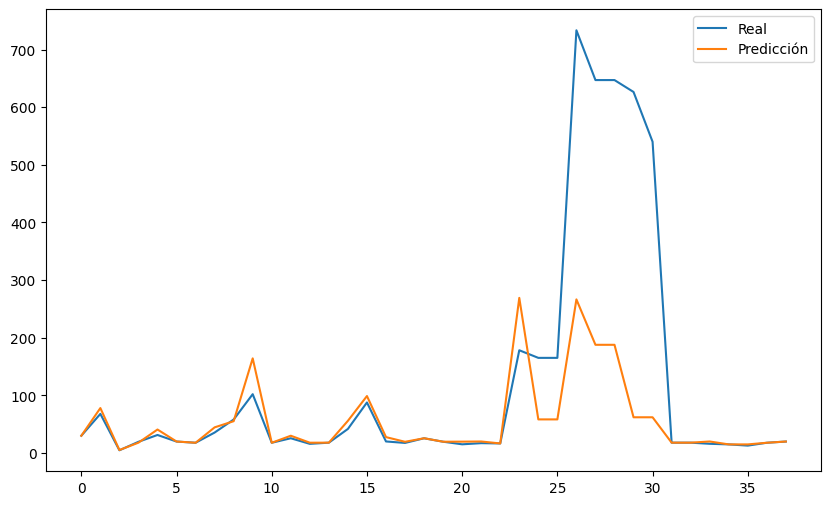

In [16]:
import matplotlib.pyplot as plt

y_pred = model.predict(dtest)

print(y_pred)
print(y_test.values)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicción')
plt.legend()
plt.show()